### SVM Voice Classification
1) Read the dataset<br>
2) Remove/handle null values (if any)<br>
3) Depict percentage distribution of label on a pie chart<br>
4) Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%<br>
5) Apply Support Vector Classifier on train data with different kernels and generate predictions on test data<br>
6) Also generate confusion_matrix and classification report for each of them<br>
7) Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy
for linear, rbf and poly kernels separately<br>
8) Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
9) Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
10) Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot gamma vs mean accuracy score on a line chart<br>
a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]<br>
b) gamma_range = [0.01,0.02,0.03,0.04,0.05]<br>
11) Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart<br>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/voice.csv')

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
d1=df['label'].value_counts()

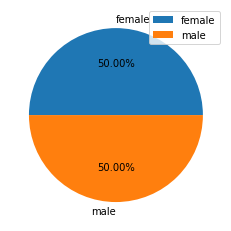

In [ ]:
plt.pie(d1,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

In [ ]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2534, 20)
(2534,)
(634, 20)
(634,)


 Apply Support Vector Classifier on train data with different kernels and generate predictions on test data and also generate confusion_matrix and classification report for each of them

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
kernal=['linear','poly','rbf']
for i in kernal:
  model=SVC(kernel=i)
  model.fit(x_train,y_train)
  print(f'With {i} kernal the accuracy score is {model.score(x_test,y_test)}')
  y_pred=model.predict(x_test)
  print(f'For {i} kernal Confusion matrix is\n {confusion_matrix(y_pred,y_test)}')
  print(f'For {i} kernal Classification report is\n {classification_report(y_pred,y_test)}')

With linear kernal the accuracy score is 0.9132492113564669
For linear kernal Confusion matrix is
 [[273  12]
 [ 43 306]]
For linear kernal Classification report is
               precision    recall  f1-score   support

      female       0.86      0.96      0.91       285
        male       0.96      0.88      0.92       349

    accuracy                           0.91       634
   macro avg       0.91      0.92      0.91       634
weighted avg       0.92      0.91      0.91       634

With poly kernal the accuracy score is 0.5094637223974764
For poly kernal Confusion matrix is
 [[309 304]
 [  7  14]]
For poly kernal Classification report is
               precision    recall  f1-score   support

      female       0.98      0.50      0.67       613
        male       0.04      0.67      0.08        21

    accuracy                           0.51       634
   macro avg       0.51      0.59      0.37       634
weighted avg       0.95      0.51      0.65       634

With rbf kernal the 

Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy for linear, rbf and poly kernels separately

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
skf=StratifiedKFold(n_splits=10)
kernal=['linear','poly','rbf']
for i in kernal:
  score=cross_val_score(SVC(kernel=i),x,y,cv=skf)
  print(f'At {i} kernal, accuracy score is {score.mean()}')

At linear kernal, accuracy score is 0.9191909914946292
At poly kernal, accuracy score is 0.5129297608114044
At rbf kernal, accuracy score is 0.658757936349479


Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart

In [ ]:
accuracy=[]
skf1=StratifiedKFold(n_splits=4)
for i in range(1,12):
  score1=cross_val_score(SVC(kernel='linear',C=i),x,y)
  print(f'At C={i},accuracy score is {score1.mean()}')
  accuracy.append(score1.mean())

At C=1,accuracy score is 0.9173172664344342
At C=2,accuracy score is 0.9387833211236863
At C=3,accuracy score is 0.9539277687243659
At C=4,accuracy score is 0.9586601282760476
At C=5,accuracy score is 0.9624456172350382
At C=6,accuracy score is 0.9646543174807262
At C=7,accuracy score is 0.9646543174807262
At C=8,accuracy score is 0.9646543174807262
At C=9,accuracy score is 0.9652857306601682
At C=10,accuracy score is 0.9646538191277827
At C=11,accuracy score is 0.9656011880734173


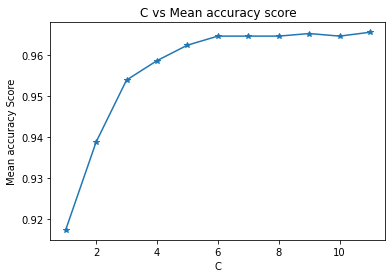

In [ ]:
plt.plot(range(1,12),accuracy,marker='*')
plt.xlabel('C')
plt.ylabel('Mean accuracy Score')
plt.title('C vs Mean accuracy score')
plt.show()

Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart

In [ ]:
acc=[]
for i in range(1,12):
  score2=cross_val_score(SVC(kernel='rbf',C=i),x,y,cv=skf1)
  acc.append(score.mean())
print(acc)

[0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479, 0.658757936349479]


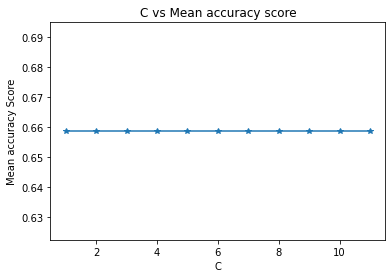

In [ ]:
plt.plot(range(1,12),acc,marker='*')
plt.xlabel('C')
plt.ylabel('Mean accuracy Score')
plt.title('C vs Mean accuracy score')
plt.show()

Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot gamma vs mean accuracy score on a line chart

In [ ]:
g_acc=[]
g = [0.0001,0.001,0.01,0.1,1,10,100]
for i in g:
  score=cross_val_score(SVC(kernel='rbf',gamma=i),x,y,cv=skf1)
  print(f'At gamma={i},accuracy is {score.mean()}')
  g_acc.append(score.mean())

At gamma=0.0001,accuracy is 0.6537247474747474
At gamma=0.001,accuracy is 0.649621212121212
At gamma=0.01,accuracy is 0.6666666666666667
At gamma=0.1,accuracy is 0.6717171717171717
At gamma=1,accuracy is 0.6849747474747474
At gamma=10,accuracy is 0.678030303030303
At gamma=100,accuracy is 0.5170454545454546


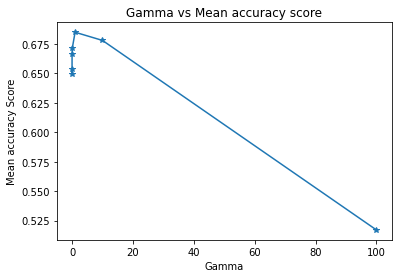

In [ ]:
plt.plot(g,g_acc,marker='*')
plt.xlabel('Gamma')
plt.ylabel('Mean accuracy Score')
plt.title('Gamma vs Mean accuracy score')
plt.show()

In [ ]:
g2=[]
g_range = [0.01,0.02,0.03,0.04,0.05]
for i in g_range:
  score=cross_val_score(SVC(kernel='rbf',gamma=i),x,y,cv=skf1)
  print(f'At gamma={i},accuracy is {score.mean()}')
  g2.append(score.mean())

At gamma=0.01,accuracy is 0.6666666666666667
At gamma=0.02,accuracy is 0.6761363636363638
At gamma=0.03,accuracy is 0.6830808080808081
At gamma=0.04,accuracy is 0.6837121212121212
At gamma=0.05,accuracy is 0.6799242424242424


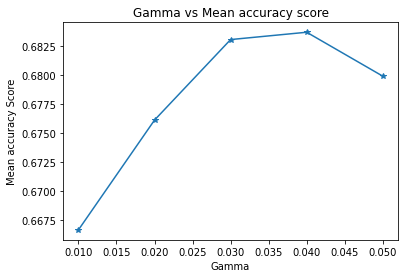

In [ ]:
plt.plot(g_range,g2,marker='*')
plt.xlabel('Gamma')
plt.ylabel('Mean accuracy Score')
plt.title('Gamma vs Mean accuracy score')
plt.show()

Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart

In [ ]:
d2=[]
deg=[i for i in range(1,7)]
for i in deg:
  score=cross_val_score(SVC(kernel='poly',degree=i),x,y,cv=skf1)
  d2.append(score.mean())

plt.plot(deg,d2,marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean accuracy Score')
plt.title('Degree vs Mean accuracy score')
plt.show()